In [90]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [91]:
df = pd.read_csv('hotel_bookings.csv')

In [92]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [93]:
data_types = df.dtypes
print(data_types)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [94]:
df.shape

(119390, 32)

In [95]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [96]:
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [97]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,40.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [98]:
df['country'].value_counts()

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [99]:
df[df['is_canceled'] == 0]['country'].value_counts()/119390

PRT    0.180015
GBR    0.081045
FRA    0.071036
ESP    0.053530
DEU    0.050833
         ...   
BHR    0.000008
DJI    0.000008
MLI    0.000008
NPL    0.000008
FRO    0.000008
Name: country, Length: 165, dtype: float64

In [100]:
len(df['is_canceled'] == 0)

119390

In [101]:
country_wise_data = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country', 'no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [102]:
#!pip install plotly

In [103]:
#!pip install chart_studio

In [104]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [105]:
import plotly.express as px

In [106]:
map_guest = px.choropleth(country_wise_data, locations = country_wise_data['country'], color= country_wise_data['no_of_guests'], hover_name = country_wise_data['country'])
map_guest.show()

In [107]:
df[df['is_canceled'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,40.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


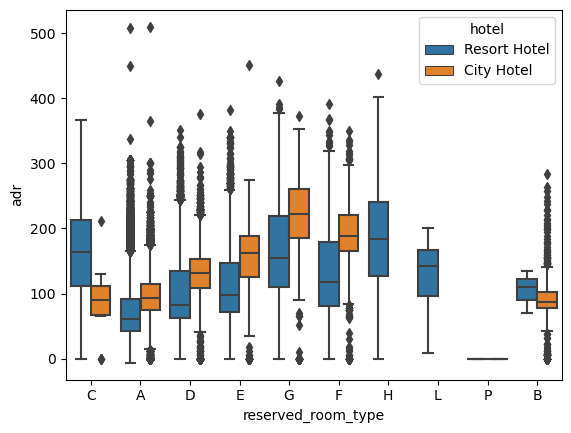

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
filtered_df = df[df['adr'] < 1000]

# Create boxplot
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=filtered_df)

# Show the plot
plt.show()
#box plot to show room types with the cost

In [109]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [110]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
data_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,40.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,40.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,40.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,40.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [111]:
rush_resort =data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns= ['months', 'no']
rush_resort

,months,no
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [112]:
rush_city =data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns= ['months', 'no']
rush_city

,months,no
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [113]:
final_rush = rush_resort.merge(rush_city, on='months')

In [114]:
final_rush.columns = ['month', 'no_of_guest_in_resort','no_of_guest_in_city']
final_rush

,month,no_of_guest_in_resort,no_of_guest_in_city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [115]:
!pip install sorted-months-weekdays
!pip install sort_dataframeby_monthorweek

In [116]:
import sort_dataframeby_monthorweek as sd

In [117]:
sd.Sort_Dataframeby_Month(final_rush, 'month')

,month,no_of_guest_in_resort,no_of_guest_in_city
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [118]:

import plotly.express as px

# Assuming 'final_rush' is your DataFrame
fig = px.line(data_frame=final_rush, x='month', y=['no_of_guest_in_resort', 'no_of_guest_in_city'])

# Show the plot
fig.show()


In [119]:
data =pd.crosstab(index = df['stays_in_weekend_nights'], columns= df['stays_in_week_nights'])
data

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,26,30,32,33,34,35,40,41,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,715,16451,17956,11564,4482,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7326,8979,6152,2412,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2361,6533,6749,4542,2669,8655,851,446,393,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,310,301,399,131,63,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,184,132,87,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
def week(row):
    feature2 = 'stays_in_week_nights'
    feature1 = 'stays_in_weekend_nights'
    if row[feature1] == 0 and row[feature2] > 0:
       return 'stay_just_weekend'
    elif row[feature2] == 0 and row[feature1] > 0:
        return 'stay_just_weekdays'
    elif row[feature2] > 0 and row[feature1] > 0:
        return 'stay_both'
    else:
        return 'stay none'

In [121]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,40.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [122]:
new_df = df
new_df['weekend_or_weekday'] = new_df.apply(week,axis=1)
new_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,stay none
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,stay none
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekend
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekend
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,stay_just_weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,40.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,stay_both
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,40.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,stay_both
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,40.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,stay_both
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,40.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,stay_both


In [123]:
new_df['weekend_or_weekday'].value_counts()

stay_both             60462
stay_just_weekend     51283
stay_just_weekdays     6930
stay none               715
Name: weekend_or_weekday, dtype: int64

In [124]:
new_df.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()
new_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,stay none
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,stay none
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekend
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekend
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,stay_just_weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,40.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,stay_both
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,40.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,stay_both
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,40.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,stay_both
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,40.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,stay_both


weekend_or_weekday,arrival_date_month,stay none,stay_both,stay_just_weekdays,stay_just_weekend
0,April,38,6030,601,4420
1,August,51,7954,647,5225
2,December,85,3132,372,3191
3,February,61,3673,533,3801
4,January,53,2342,457,3077
5,July,60,7448,621,4532
6,June,42,5399,554,4944
7,March,66,4714,500,4514
8,May,79,5723,788,5201
9,November,71,3186,333,3204


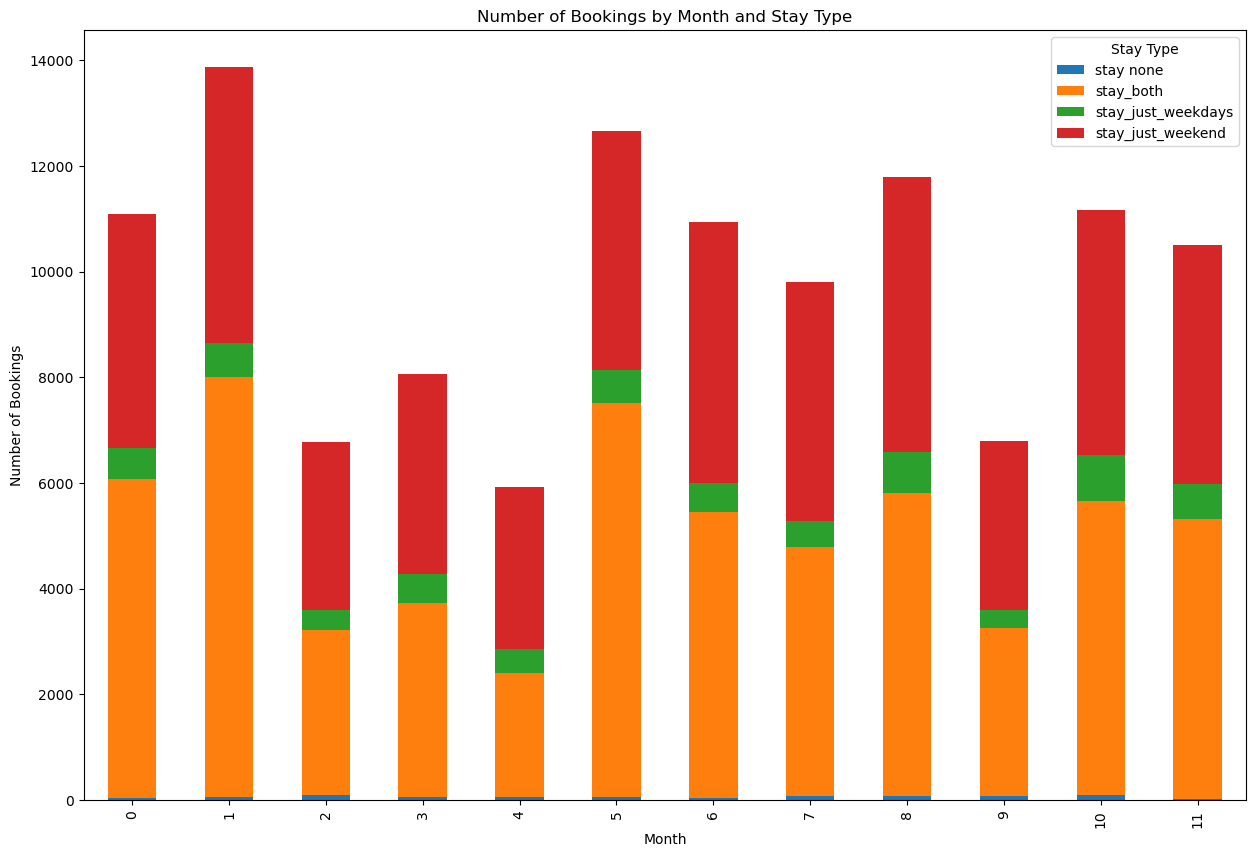

In [125]:
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame
grouped_df = new_df.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()
display(grouped_df)

# Plotting the bar plot
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(15, 10))

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bookings')
ax.set_title('Number of Bookings by Month and Stay Type')

# Adding legend
ax.legend(title='Stay Type')

# Show the plot
plt.show()


In [126]:
def family(row):
    if((row['adults']) > 0 and (row['children'] or row['babies'] >0) ):
        return 1;
    else:
        return 0;


In [127]:
df['is_family'] = df.apply(family, axis=1)

In [128]:
df['total_customers'] = df['adults'] + df['children'] + df['babies']

In [129]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [130]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customers,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,stay none,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,stay none,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekend,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekend,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekend,0,2.0,2


In [131]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [132]:
dict = {'No Deposit':0, 'Non Refund':1, 'Refundable':0}

In [133]:
df['deposit_given'] =df['deposit_type'].map(dict)

In [134]:
df.drop(columns=['adults', 'children', 'babies'], axis=1, inplace = True)

In [135]:
df.drop(columns=['deposit_type'], axis=1, inplace = True)

In [136]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customers,total_nights,deposit_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0.00,0,0,Check-Out,7/1/2015,stay none,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,0.00,0,0,Check-Out,7/1/2015,stay none,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,75.00,0,0,Check-Out,7/2/2015,stay_just_weekend,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,75.00,0,0,Check-Out,7/2/2015,stay_just_weekend,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,98.00,0,1,Check-Out,7/3/2015,stay_just_weekend,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,BB,...,96.14,0,0,Check-Out,9/6/2017,stay_both,0,2.0,7,0
119386,City Hotel,0,102,2017,August,35,31,2,5,BB,...,225.43,0,2,Check-Out,9/7/2017,stay_both,0,3.0,7,0
119387,City Hotel,0,34,2017,August,35,31,2,5,BB,...,157.71,0,4,Check-Out,9/7/2017,stay_both,0,2.0,7,0
119388,City Hotel,0,109,2017,August,35,31,2,5,BB,...,104.40,0,0,Check-Out,9/7/2017,stay_both,0,2.0,7,0


In [137]:
cate_features = [col for col in df.columns if(df[col].dtype == 'object')]
    
        

In [138]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
newest_df=df[cate_features]
newest_df['cancellation'] = df['is_canceled']

In [139]:
cols = newest_df.columns

In [140]:


for col in cols:
    dict4 = newest_df.groupby(col)['cancellation'].mean().to_dict()
    newest_df[col] = newest_df[col].map(dict4)


In [141]:
newest_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,0.800000,0.048951,0.0
1,0.277634,0.374536,0.373849,0.562085,0.153419,0.174599,0.330472,0.187789,0.407463,0.0,0.800000,0.048951,0.0
2,0.277634,0.374536,0.373849,0.202243,0.153419,0.174599,0.391074,0.187789,0.407463,0.0,0.985075,0.379580,0.0
3,0.277634,0.374536,0.373849,0.202243,0.187347,0.220758,0.391074,0.444925,0.407463,0.0,0.985075,0.379580,0.0
4,0.277634,0.374536,0.373849,0.202243,0.367211,0.410259,0.391074,0.444925,0.407463,0.0,0.522876,0.379580,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0.377531,0.373849,0.202391,0.343160,0.410259,0.391074,0.444925,0.407463,0.0,0.000000,0.377841,0.0
119386,0.417270,0.377531,0.373849,0.185694,0.367211,0.410259,0.292884,0.252114,0.407463,0.0,0.000000,0.377841,0.0
119387,0.417270,0.377531,0.373849,0.167147,0.367211,0.410259,0.317796,0.251244,0.407463,0.0,0.000000,0.377841,0.0
119388,0.417270,0.377531,0.373849,0.202243,0.367211,0.410259,0.391074,0.444925,0.407463,0.0,0.000000,0.377841,0.0


In [142]:
for col in cols:
    df[col] = newest_df[col]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customers,total_nights,deposit_given,cancellation
0,0.277634,0,342,2015,0.374536,27,1,0,0,0.373849,...,0,0,0.0,0.800000,0.048951,0,2.0,0,0,0.0
1,0.277634,0,737,2015,0.374536,27,1,0,0,0.373849,...,0,0,0.0,0.800000,0.048951,0,2.0,0,0,0.0
2,0.277634,0,7,2015,0.374536,27,1,0,1,0.373849,...,0,0,0.0,0.985075,0.379580,0,1.0,1,0,0.0
3,0.277634,0,13,2015,0.374536,27,1,0,1,0.373849,...,0,0,0.0,0.985075,0.379580,0,1.0,1,0,0.0
4,0.277634,0,14,2015,0.374536,27,1,0,2,0.373849,...,0,1,0.0,0.522876,0.379580,0,2.0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0,23,2017,0.377531,35,30,2,5,0.373849,...,0,0,0.0,0.000000,0.377841,0,2.0,7,0,0.0
119386,0.417270,0,102,2017,0.377531,35,31,2,5,0.373849,...,0,2,0.0,0.000000,0.377841,0,3.0,7,0,0.0
119387,0.417270,0,34,2017,0.377531,35,31,2,5,0.373849,...,0,4,0.0,0.000000,0.377841,0,2.0,7,0,0.0
119388,0.417270,0,109,2017,0.377531,35,31,2,5,0.373849,...,0,0,0.0,0.000000,0.377841,0,2.0,7,0,0.0


In [143]:
def handle_outlier(col):
    df[col] =np.log1p(df[col])

In [144]:
handle_outlier('lead_time')

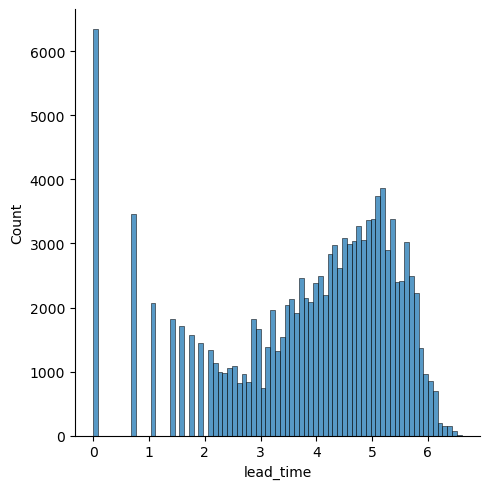

In [145]:
sns.displot(df['lead_time'])

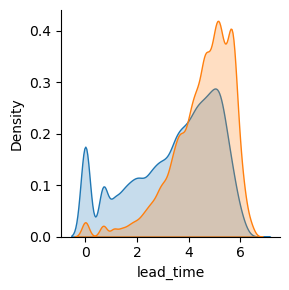

In [146]:
sns.FacetGrid(df, hue = 'is_canceled').map(sns.kdeplot, 'lead_time', shade= True)

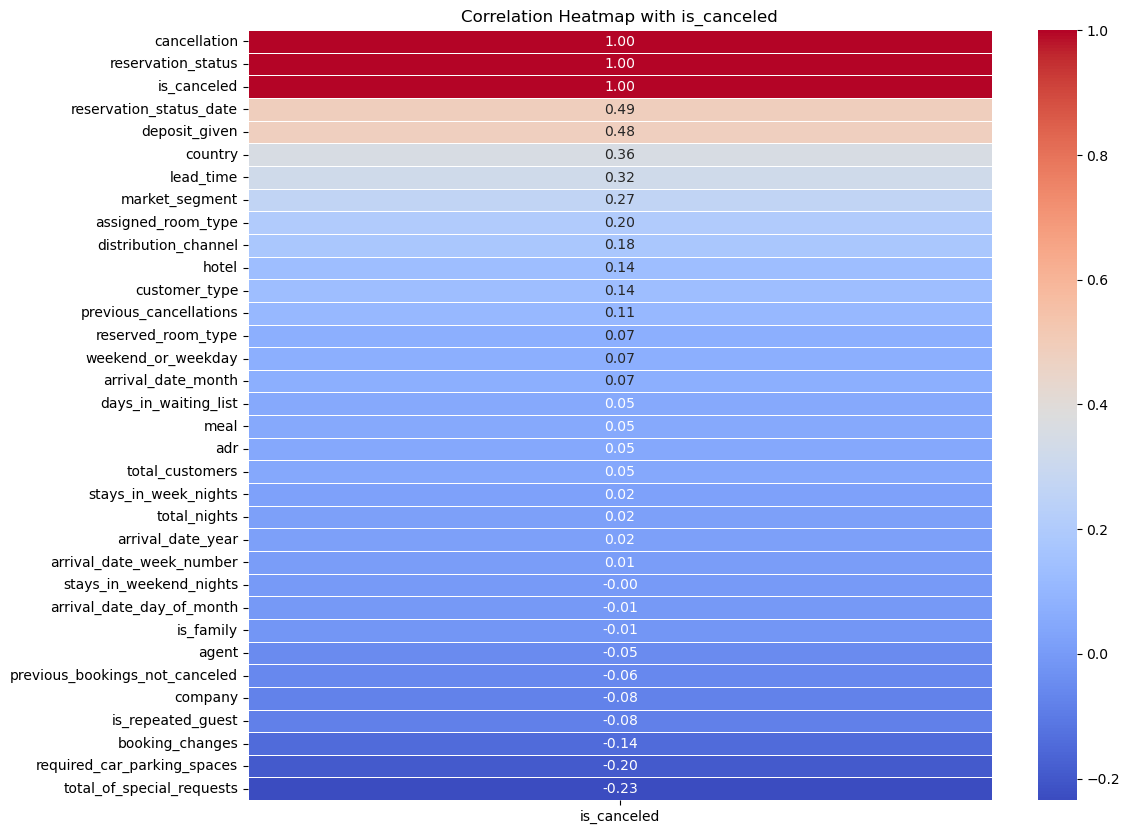

In [147]:



corr_with_target = df.corr()['is_canceled'].sort_values(ascending=False)

# Create a dataframe with only the correlation values for 'is_canceled'
corr_df = df[corr_with_target.index].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df[['is_canceled']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with is_canceled')
plt.show()


In [148]:
feature_to_drop = ['reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'cancellation']

In [149]:
df.drop(feature_to_drop, axis=1, inplace = True)

In [150]:
df

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,weekend_or_weekday,is_family,total_customers,total_nights,deposit_given
0,0.277634,0,5.837730,0.374536,0,0.373849,0.562085,0.153419,0.174599,0,...,0,0.407463,0.00,0,0,0.048951,0,2.0,0,0
1,0.277634,0,6.603944,0.374536,0,0.373849,0.562085,0.153419,0.174599,0,...,0,0.407463,0.00,0,0,0.048951,0,2.0,0,0
2,0.277634,0,2.079442,0.374536,1,0.373849,0.202243,0.153419,0.174599,0,...,0,0.407463,75.00,0,0,0.379580,0,1.0,1,0
3,0.277634,0,2.639057,0.374536,1,0.373849,0.202243,0.187347,0.220758,0,...,0,0.407463,75.00,0,0,0.379580,0,1.0,1,0
4,0.277634,0,2.708050,0.374536,2,0.373849,0.202243,0.367211,0.410259,0,...,0,0.407463,98.00,0,1,0.379580,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0,3.178054,0.377531,5,0.373849,0.202391,0.343160,0.410259,0,...,0,0.407463,96.14,0,0,0.377841,0,2.0,7,0
119386,0.417270,0,4.634729,0.377531,5,0.373849,0.185694,0.367211,0.410259,0,...,0,0.407463,225.43,0,2,0.377841,0,3.0,7,0
119387,0.417270,0,3.555348,0.377531,5,0.373849,0.167147,0.367211,0.410259,0,...,0,0.407463,157.71,0,4,0.377841,0,2.0,7,0
119388,0.417270,0,4.700480,0.377531,5,0.373849,0.202243,0.367211,0.410259,0,...,0,0.407463,104.40,0,0,0.377841,0,2.0,7,0


In [151]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [152]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [153]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
weekend_or_weekday                0
is_family                         0
total_customers                   0
total_nights                      0
deposit_given                     0
dtype: int64

In [154]:
feature_Sel_model = SelectFromModel(Lasso(alpha= 0.005))

In [155]:
feature_Sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [156]:
feature_Sel_model.get_support()

array([False,  True, False, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True])

In [157]:
cols = X.columns

In [158]:
sel_feature = cols[feature_Sel_model.get_support()]

In [159]:
X = X[sel_feature]

In [160]:
X

,lead_time,country,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_nights,deposit_given
0,5.837730,0.562085,0,0,3,9.0,40.0,0,0.00,0,0,2.0,0,0
1,6.603944,0.562085,0,0,4,9.0,40.0,0,0.00,0,0,2.0,0,0
2,2.079442,0.202243,0,0,0,9.0,40.0,0,75.00,0,0,1.0,1,0
3,2.639057,0.202243,0,0,0,304.0,40.0,0,75.00,0,0,1.0,1,0
4,2.708050,0.202243,0,0,0,240.0,40.0,0,98.00,0,1,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,0.202391,0,0,0,394.0,40.0,0,96.14,0,0,2.0,7,0
119386,4.634729,0.185694,0,0,0,9.0,40.0,0,225.43,0,2,3.0,7,0
119387,3.555348,0.167147,0,0,0,9.0,40.0,0,157.71,0,4,2.0,7,0
119388,4.700480,0.202243,0,0,0,89.0,40.0,0,104.40,0,0,2.0,7,0


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [162]:
X_train

,lead_time,country,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_nights,deposit_given
67702,4.174387,0.202243,0,0,0,9.0,40.0,0,189.00,0,0,3.0,3,0
115851,3.555348,0.185694,0,0,0,14.0,40.0,0,146.00,0,0,3.0,2,0
57345,2.197225,0.254085,0,0,0,9.0,40.0,0,259.00,0,0,4.0,2,0
11622,5.529429,0.185694,0,0,0,9.0,40.0,0,89.70,0,1,2.0,6,0
33333,3.178054,0.202243,0,0,0,241.0,40.0,0,42.43,0,1,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,1.098612,0.562085,2,4,1,9.0,40.0,0,77.00,1,0,2.0,1,0
110268,4.521789,0.182106,0,0,0,9.0,40.0,0,135.00,0,0,2.0,5,0
103694,4.317488,0.353956,0,0,0,22.0,40.0,0,92.65,0,0,3.0,3,0
860,4.875197,0.562085,0,0,0,240.0,40.0,0,120.60,0,2,2.0,7,0


In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
logreg = LogisticRegression()

In [165]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [166]:
pred =logreg.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score


conf_matrix = confusion_matrix(y_test, pred)
precision = precision_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision Score:", precision)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[14383   524]
 [ 4584  4387]]

Precision Score: 0.8933007534107107

Accuracy Score: 0.7860792361169278


In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)


# Evaluate models
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, rf_pred))





RandomForestClassifier Accuracy: 0.8811039450540247


Accuracy on the test set: 0.7560097160566212
Best 'max_depth': 3
Best 'min_samples_split': 5
[0 1]


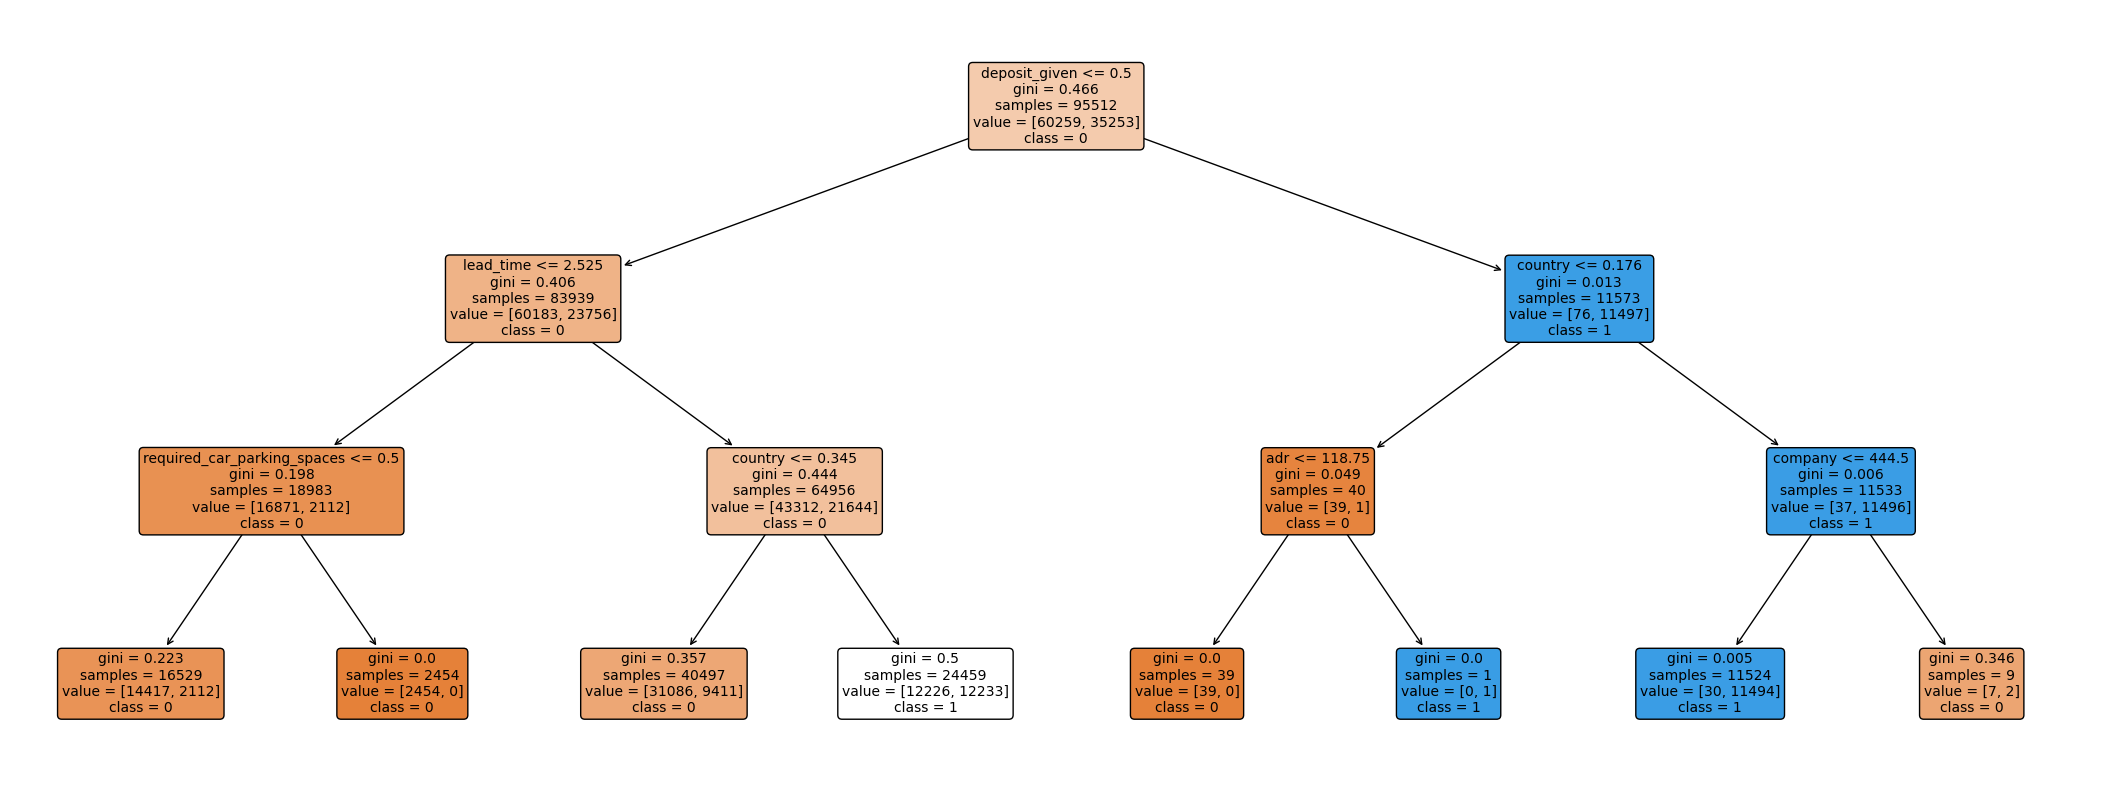

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt_classifier = DecisionTreeClassifier(random_state = 42)
param_grid = {
    'max_depth': [ 3],
    'min_samples_split': [ 5, 7]
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

# Display the best hyperparameter values
print(f"Best 'max_depth': {best_max_depth}")
print(f"Best 'min_samples_split': {best_min_samples_split}")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
print(y.unique())

# Assuming you have your features (X) and labels (y)
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  # You can set the desired max_depth

# Fit the model to your data
dt_classifier.fit(X_train, y_train)

# Convert class names to strings
class_names_str = [str(class_name) for class_name in dt_classifier.classes_]

# Plot the decision tree
plt.figure(figsize=(27, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=class_names_str, rounded=True, fontsize=10)
plt.show()

In [180]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [184]:
Models =[]
Models.append(('LogisticRegression', LogisticRegression()))
Models.append(('Naive Bayes', GaussianNB()))
Models.append(('K-neighbors', KNeighborsClassifier()))

In [185]:
for name,model in Models:
    print(name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    print(confusion_matrix(predictions, y_test))
    print(score)

LogisticRegression
[[14383  4584]
 [  524  4387]]
0.7860792361169278
Naive Bayes
[[8414 1164]
 [6493 7807]]
0.6793282519473993
K-neighbors
[[13054  2564]
 [ 1853  6407]]
0.8150180082083927


LogisticRegression


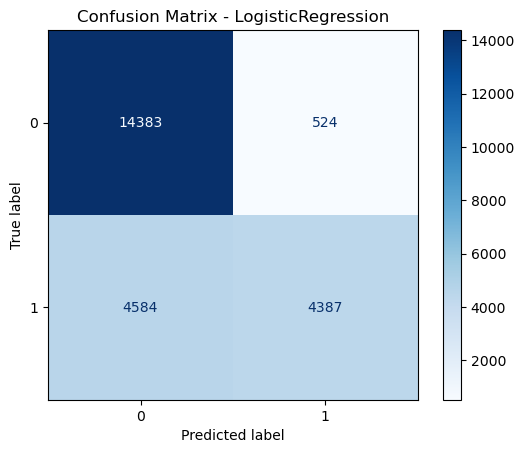

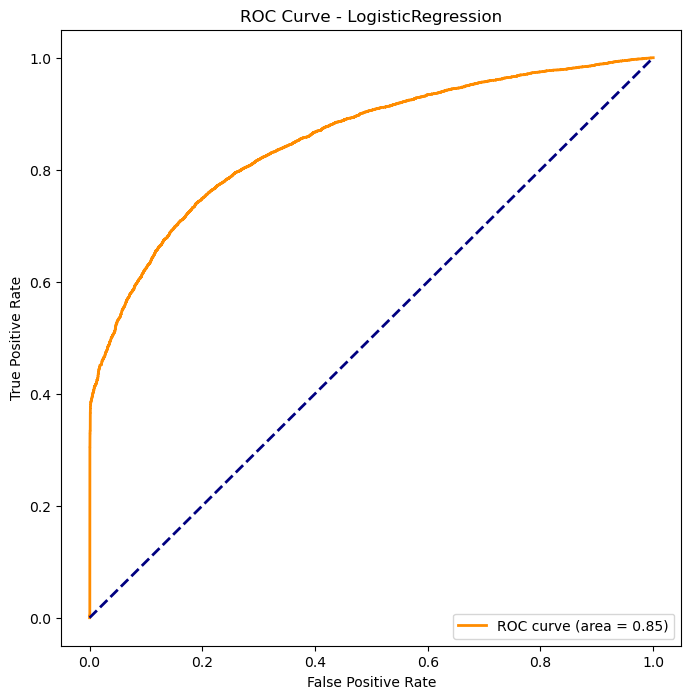

Naive Bayes


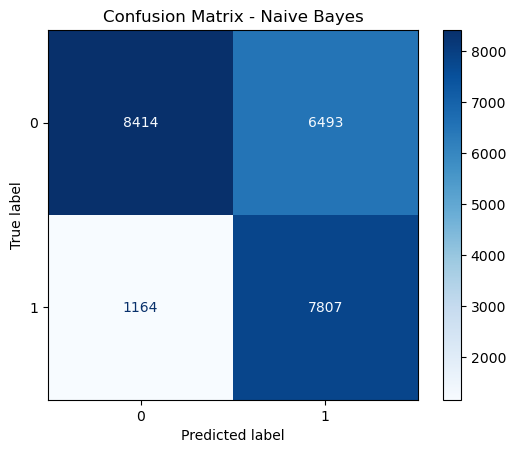

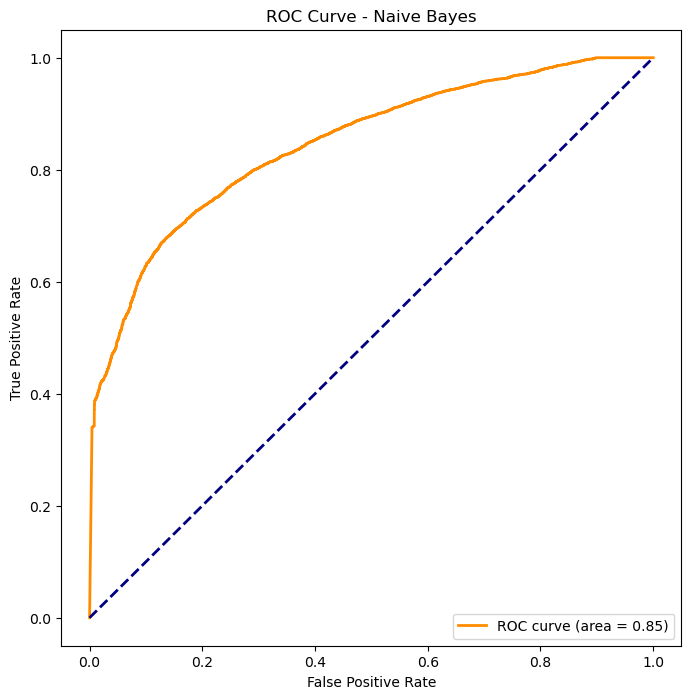

K-neighbors


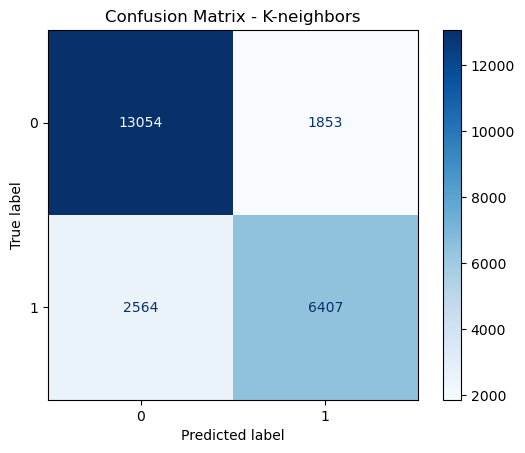

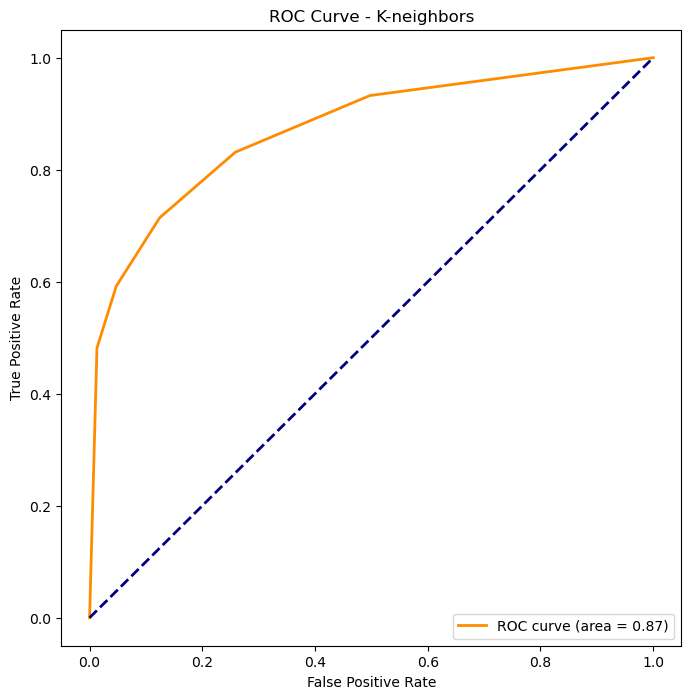

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

# Iterate through models and visualize
for name, model in Models:
    print(name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Plot confusion matrix
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
    disp.ax_.set_title('Confusion Matrix - {}'.format(name))
    plt.show()

    # If the model has predict_proba method (e.g., logistic regression), plot ROC curve
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, name)
